Exploratory Data Analysis 
(EDA)

### Table of Contents



1. [Introduction](#1.0.-Introduction)

2. [Importing Library's](#2.0.-Importing-Library's)

3. [Loading Data](#3.0.-loading-data)

4. [Transformation and Cleaning of Data](#4.0.-Transformation-and-Cleaning-of-Data)
    
    4.1. [Changing Non Categorical to Categorical](#4.1.-Changing-Non-Categorical-to-Categorical)
    
    4.2. [Creating the Target Values](#4.2.-Creating-the-Target-Values)

5. [EDA](#5.0.-EDA)

6. [Saving the Data](#6.0.-Saving-the-Data)

7. [Summary](#7.0.-Summary)

### 1.0. Introduction

In this notebook.I will be doing data cleaning and EDA of the dataset

### 2.0. Importing Library's

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import numpy as np
from openpyxl import Workbook

In [88]:
def plotMissingData(df):
    plt.figure(figsize=(10, 10))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.show()

### 3.0. Loading Data

I'll first load the data sets savedout from the data wrangling notebook.


In [89]:
base_dir = os.getcwd()
joined_data = pd.read_csv(base_dir + '/joined_data.csv')


In [90]:
joined_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


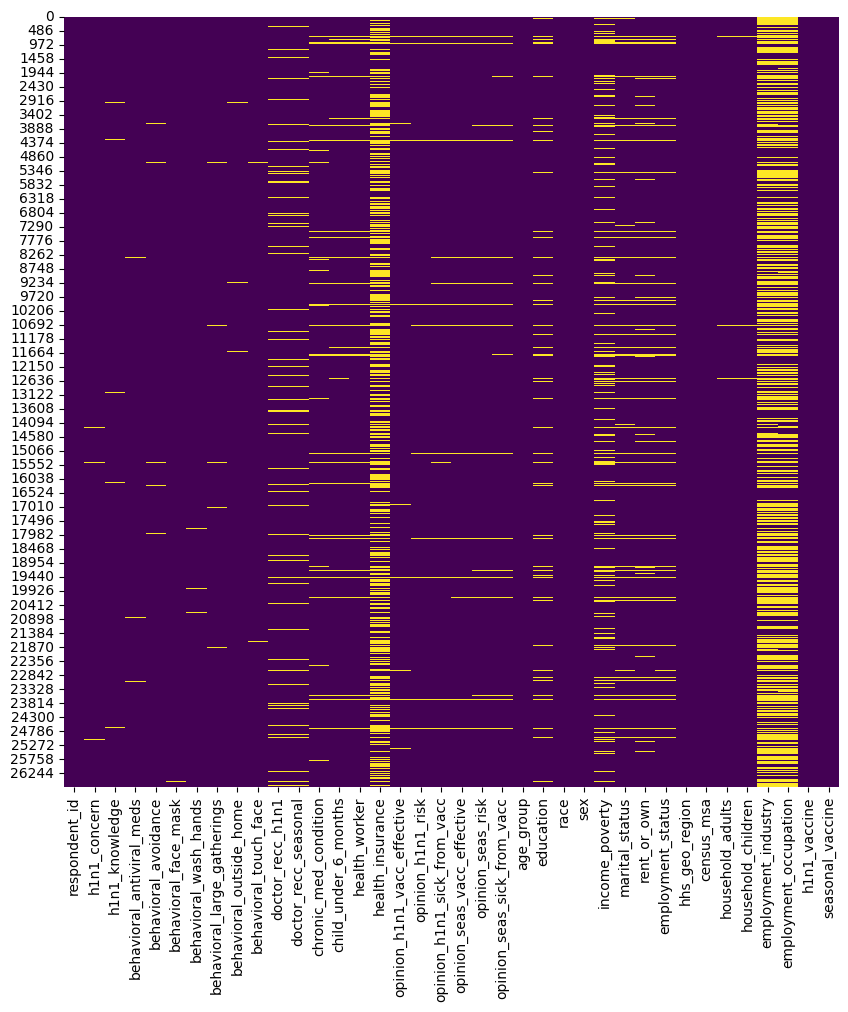

In [91]:
plotMissingData(joined_data)

#### 4.0. Transformation and Cleaning of Data

### 4.1. Changing Non Categorical to Categorical

Now I need to change all the non-categorical values to categorical.

These are all the columns in the dataFrame joined_data with their numerical meaning that I added to separate dictionaries.

h1n1_concern                    0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
h1n1_knowledge                  0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
behavioral_antiviral_meds       Has taken antiviral medications. (binary)
behavioral_avoidance            Has avoided close contact with others with flu-like symptoms. (binary)
behavioral_face_mask            Has bought a face mask. (binary)
behavioral_wash_hands           Has frequently washed hands or used hand sanitizer. (binary)
behavioral_large_gatherings     Has reduced time at large gatherings. (binary)
behavioral_outside_home         Has reduced contact with people outside of own household. (binary)
behavioral_touch_face           Has avoided touching eyes, nose, or mouth. (binary)
doctor_recc_h1n1                H1N1 flu vaccine was recommended by doctor. (binary)
doctor_recc_seasonal            Seasonal flu vaccine was recommended by doctor. (binary)
chronic_med_condition           Has any of the following chronic medical conditions: asthma or an other lung 
                                    condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemiaa neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
child_under_6_months            Has regular close contact with a child under the age of six months. (binary)
health_worker                   Is a healthcare worker. (binary)
health_insurance                Has health insurance. (binary)
opinion_h1n1_vacc_effective     Respondent's opinion about H1N1 vaccine effectiveness.
                                    1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
opinion_h1n1_risk               Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
                                    1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
opinion_h1n1_sick_from_vacc     Respondent's worry of getting sick from taking H1N1 vaccine.
                                    1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
opinion_seas_vacc_effective     Respondent's opinion about seasonal flu vaccine effectiveness.  
                                    1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
opinion_seas_risk               Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
                                    1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
opinion_seas_sick_from_vacc     Respondent's worry of getting sick from taking seasonal flu vaccine.
                                    1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
age_group                       Age group of respondent.
education                       Self-reported education level.
race                            Race of respondent.
sex                             Sex of respondent.
income_poverty                  Household annual income of respondent with respect to 2008 Census poverty thresholds.
marital_status                  Marital status of respondent.
rent_or_own                     Housing situation of respondent.
employment_status               Employment status of respondent.
hhs_geo_region                  Respondent's residence using a 10-region geographic classification defined by the U.S. Dept.
                                    of Health and Human Services. Values are represented as short random character strings.
census_msa                      Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S.
                                    Census.
household_adults                Number of other adults in household, top-coded to 3.
household_children              Number of children in household, top-coded to 3.
employment_industry             Type of industry respondent is employed in. Values are represented as short random character 
                                    strings.
employment_occupation           Type of occupation of respondent. Values are represented as short random character strings.
h1n1_vaccine                    Whether respondent received H1N1 flu vaccine.
seasonal_vaccine                Whether respondent received seasonal flu vaccine.

In [92]:
#Example of how to change the values of a column using a dictionary
'''
# Create a dictionary to map old values to new values
mapping_dict = {'old_value1': 'new_value1', 'old_value2': 'new_value2', 'old_value3': 'new_value3'}

# Change the values of the 'column_name' column using the dictionary
df['column_name'] = df['column_name'].map(mapping_dict)

'''

"\n# Create a dictionary to map old values to new values\nmapping_dict = {'old_value1': 'new_value1', 'old_value2': 'new_value2', 'old_value3': 'new_value3'}\n\n# Change the values of the 'column_name' column using the dictionary\ndf['column_name'] = df['column_name'].map(mapping_dict)\n\n"

In [93]:
#showing the uniquie values of h1n1_concern
joined_data['h1n1_concern'].unique()

array([ 1.,  3.,  2.,  0., nan])

In [94]:
h1n1_concern_dict= {0: 'Not at all concerned', 1: 'Not very concerned', 2: 'Somewhat concerned', 3: 'Very concerned', np.nan: 'Unknown'}
#df['City'] = df['City'].replace(city_mapping)
joined_data['h1n1_concern'] = joined_data['h1n1_concern'].map(h1n1_concern_dict)


In [95]:
joined_data['h1n1_concern'].unique()

array(['Not very concerned', 'Very concerned', 'Somewhat concerned',
       'Not at all concerned', 'Unknown'], dtype=object)

In [96]:
joined_data['h1n1_knowledge'].unique()


array([ 0.,  2.,  1., nan])

In [97]:
h1n1_knowledge_dict= {0: 'No knowledge', 1: 'A little knowledge', 2: 'A lot of knowledge', np.nan: 'Unknown'}
joined_data['h1n1_knowledge'] = joined_data['h1n1_knowledge'].map(h1n1_knowledge_dict)


In [98]:
joined_data['h1n1_knowledge'].unique()


array(['No knowledge', 'A lot of knowledge', 'A little knowledge',
       'Unknown'], dtype=object)

In [99]:
joined_data['behavioral_antiviral_meds'].unique()


array([ 0.,  1., nan])

In [100]:
behavioral_antiviral_meds_dict= {0: 'Not on antiviral medications', 1: 'On antiviral medications', np.nan: 'Unknown'}
joined_data['behavioral_antiviral_meds'] = joined_data['behavioral_antiviral_meds'].map(behavioral_antiviral_meds_dict)


In [101]:
joined_data['behavioral_antiviral_meds'].unique()

array(['Not on antiviral medications', 'On antiviral medications',
       'Unknown'], dtype=object)

In [102]:
joined_data['behavioral_avoidance'].unique()
behavioral_avoidance_dict= {0: 'Did not avoid', 1: 'Avoided', np.nan: 'Unknown'}
joined_data['behavioral_avoidance'] = joined_data['behavioral_avoidance'].map(behavioral_avoidance_dict)
joined_data['behavioral_avoidance'].unique()


array(['Did not avoid', 'Avoided', 'Unknown'], dtype=object)

In [103]:
joined_data['behavioral_face_mask'].unique()


array([ 0.,  1., nan])

In [104]:
behavioral_face_mask_dict= {0: 'Did not wear mask', 1: 'Wore mask', np.nan: 'Unknown'}
joined_data['behavioral_face_mask'] = joined_data['behavioral_face_mask'].map(behavioral_face_mask_dict)


In [105]:
joined_data['behavioral_face_mask'].unique()


array(['Did not wear mask', 'Wore mask', 'Unknown'], dtype=object)

In [106]:
joined_data['behavioral_wash_hands'].unique()
behavioral_wash_hands_dict= {0: 'Did not wash hands', 1: 'Washed hands', np.nan: 'Unknown'}
joined_data['behavioral_wash_hands'] = joined_data['behavioral_wash_hands'].map(behavioral_wash_hands_dict)
joined_data['behavioral_wash_hands'].unique()

array(['Did not wash hands', 'Washed hands', 'Unknown'], dtype=object)

In [107]:
joined_data['behavioral_large_gatherings'].unique()
behavioral_large_gatherings_dict= {0: 'Did not avoid large gatherings', 1: 'Avoided large gatherings', np.nan: 'Unknown'}
joined_data['behavioral_large_gatherings'] = joined_data['behavioral_large_gatherings'].map(behavioral_large_gatherings_dict)
joined_data['behavioral_large_gatherings'].unique()

array(['Did not avoid large gatherings', 'Avoided large gatherings',
       'Unknown'], dtype=object)

In [108]:
joined_data['behavioral_outside_home'].unique()
behavioral_outside_home_dict= {0: 'Did not leave home', 1: 'Left home', np.nan: 'Unknown'}
joined_data['behavioral_outside_home'] = joined_data['behavioral_outside_home'].map(behavioral_outside_home_dict)
joined_data['behavioral_outside_home'].unique()

array(['Left home', 'Did not leave home', 'Unknown'], dtype=object)

In [109]:
joined_data['behavioral_touch_face'].unique()
behavioral_touch_face_dict= {0: 'Did not touch face', 1: 'Touched face', np.nan: 'Unknown'}
joined_data['behavioral_touch_face'] = joined_data['behavioral_touch_face'].map(behavioral_touch_face_dict)
joined_data['behavioral_touch_face'].unique()

array(['Touched face', 'Did not touch face', 'Unknown'], dtype=object)

In [110]:
joined_data['doctor_recc_h1n1'].unique()
doctor_recc_h1n1_dict= {0: 'Not Recommended', 1: 'Recommended', np.nan: 'Unknown'}
joined_data['doctor_recc_h1n1'] = joined_data['doctor_recc_h1n1'].map(doctor_recc_h1n1_dict)
joined_data['doctor_recc_h1n1'].unique()

array(['Not Recommended', 'Unknown', 'Recommended'], dtype=object)

In [111]:
joined_data['doctor_recc_seasonal'].unique()
doctor_recc_seasonal_dict= {0: 'Not Recommended', 1: 'Recommended', np.nan: 'Unknown'}
joined_data['doctor_recc_seasonal'] = joined_data['doctor_recc_seasonal'].map(doctor_recc_seasonal_dict)
joined_data['doctor_recc_seasonal'].unique()

array(['Not Recommended', 'Unknown', 'Recommended'], dtype=object)

In [112]:
joined_data['chronic_med_condition'].unique()


array([ 0.,  1., nan])

In [113]:
chronic_med_condition_dict= {0: 'No chronic condition', 1: 'Has chronic condition', np.nan: 'Unknown'}  
joined_data['chronic_med_condition'] = joined_data['chronic_med_condition'].map(chronic_med_condition_dict) 
joined_data['chronic_med_condition'].unique()

array(['No chronic condition', 'Has chronic condition', 'Unknown'],
      dtype=object)

In [114]:
joined_data['child_under_6_months'].unique()
child_under_6_months_dict= {0: 'No child under 6 months', 1: 'Has child under 6 months', np.nan: 'Unknown'}
joined_data['child_under_6_months'] = joined_data['child_under_6_months'].map(child_under_6_months_dict)
joined_data['child_under_6_months'].unique()

array(['No child under 6 months', 'Has child under 6 months', 'Unknown'],
      dtype=object)

In [115]:
joined_data['health_worker'].unique()
health_worker_dict= {0: 'Not health worker', 1: 'Health worker', np.nan: 'Unknown'}
joined_data['health_worker'] = joined_data['health_worker'].map(health_worker_dict)
joined_data['health_worker'].unique()

array(['Not health worker', 'Health worker', 'Unknown'], dtype=object)

In [116]:
joined_data['health_insurance'].unique()
health_insurance_dict= {0: 'No health insurance', 1: 'Has health insurance', np.nan: 'Unknown'}
joined_data['health_insurance'] = joined_data['health_insurance'].map(health_insurance_dict)
joined_data['health_insurance'].unique()

array(['Has health insurance', 'Unknown', 'No health insurance'],
      dtype=object)

In [117]:
joined_data['opinion_h1n1_vacc_effective'].unique()
opinion_h1n1_vacc_effective_dict= {1: 'Not effective', 2: 'Not very effective', 3: 'Dont know', 4: 'Somewhat effective', 5: 'Very effective', np.nan: 'Unknown'}
joined_data['opinion_h1n1_vacc_effective'] = joined_data['opinion_h1n1_vacc_effective'].map(opinion_h1n1_vacc_effective_dict)
joined_data['opinion_h1n1_vacc_effective'].unique()

array(['Dont know', 'Very effective', 'Somewhat effective',
       'Not very effective', 'Not effective', 'Unknown'], dtype=object)

In [118]:
joined_data['opinion_h1n1_risk'].unique()
opinion_h1n1_risk_dict= {1: 'Very Low', 2: 'Low', 3: 'Moderate', 4: 'High', 5: 'Very High', np.nan: 'Unknown'}
joined_data['opinion_h1n1_risk'] = joined_data['opinion_h1n1_risk'].map(opinion_h1n1_risk_dict)
joined_data['opinion_h1n1_risk'].unique()

array(['Very Low', 'High', 'Moderate', 'Low', 'Very High', 'Unknown'],
      dtype=object)

In [119]:
#opinion_h1n1_sick_from_vacc
joined_data['opinion_h1n1_sick_from_vacc'].unique()
opinion_h1n1_sick_from_vacc_dict= {1: 'Not at all worried', 2: 'Not very worried', 3: 'Dont know', 4: 'Somewhat worried', 5: 'Very worried', np.nan: 'Unknown'}
joined_data['opinion_h1n1_sick_from_vacc'] = joined_data['opinion_h1n1_sick_from_vacc'].map(opinion_h1n1_sick_from_vacc_dict)
joined_data['opinion_h1n1_sick_from_vacc'].unique()

array(['Not very worried', 'Somewhat worried', 'Not at all worried',
       'Very worried', 'Dont know', 'Unknown'], dtype=object)

In [120]:
#opinion_seas_vacc_effective
joined_data['opinion_seas_vacc_effective'].unique()
opinion_seas_vacc_effective_dict= {1: 'Not effective', 2: 'Not very effective', 3: 'Dont know', 4: 'Somewhat effective', 5: 'Very effective', np.nan: 'Unknown'}
joined_data['opinion_seas_vacc_effective'] = joined_data['opinion_seas_vacc_effective'].map(opinion_seas_vacc_effective_dict)
joined_data['opinion_seas_vacc_effective'].unique()

array(['Not very effective', 'Somewhat effective', 'Very effective',
       'Dont know', 'Not effective', 'Unknown'], dtype=object)

In [121]:
joined_data['opinion_seas_risk'].unique()
opinion_seas_risk_dict= {1: 'Very Low', 2: 'Low', 3: 'Moderate', 4: 'High', 5: 'Very High', np.nan: 'Unknown'}
joined_data['opinion_seas_risk'] = joined_data['opinion_seas_risk'].map(opinion_seas_risk_dict)
joined_data['opinion_seas_risk'].unique()

array(['Very Low', 'Low', 'High', 'Moderate', 'Very High', 'Unknown'],
      dtype=object)

In [122]:
joined_data['opinion_seas_sick_from_vacc'].unique()
opinion_seas_sick_from_vacc_dict= {1: 'Not at all worried', 2: 'Not very worried', 3: 'Dont know', 4: 'Somewhat worried', 5: 'Very worried', np.nan: 'Unknown'}
joined_data['opinion_seas_sick_from_vacc'] = joined_data['opinion_seas_sick_from_vacc'].map(opinion_seas_sick_from_vacc_dict)
joined_data['opinion_seas_sick_from_vacc'].unique()

array(['Not very worried', 'Somewhat worried', 'Not at all worried',
       'Very worried', 'Unknown', 'Dont know'], dtype=object)

In [123]:
joined_data['age_group'].unique()


array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [124]:
joined_data['education'].unique()


array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [125]:
joined_data['education'] = joined_data['education'].fillna('Unknown')

In [126]:
joined_data['education'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College',
       'Unknown'], dtype=object)

In [127]:
joined_data['household_adults'].unique()

array([ 0.,  2.,  1.,  3., nan])

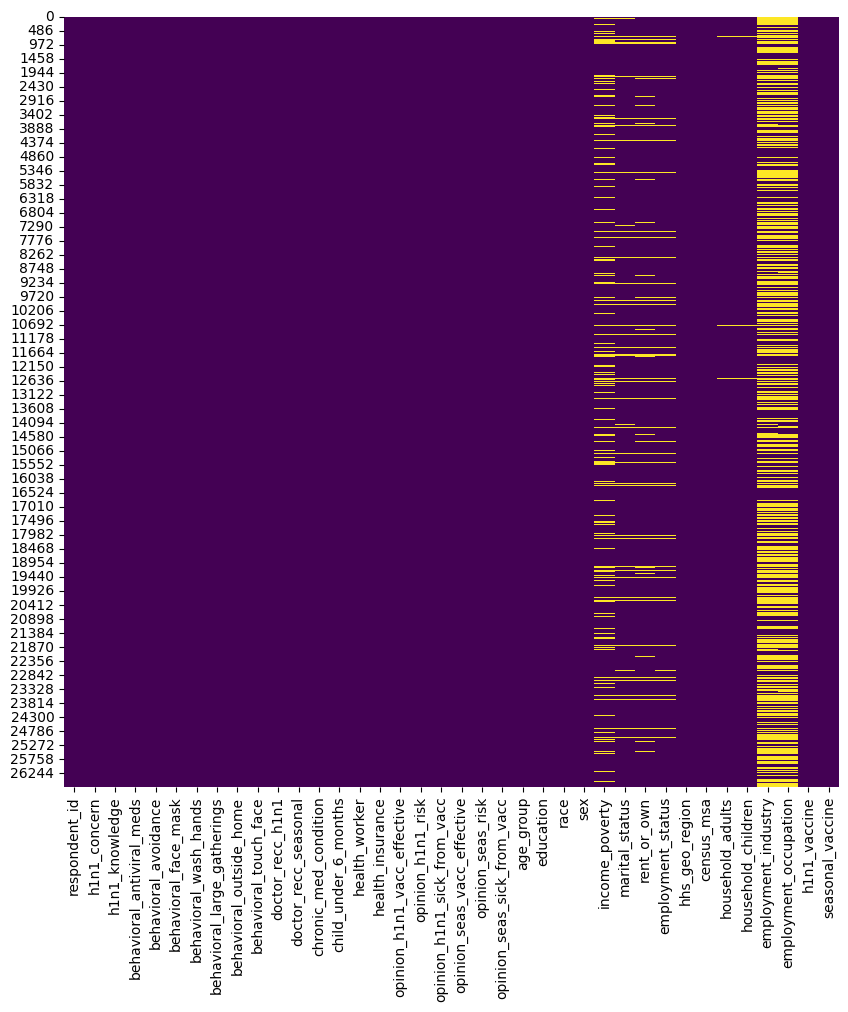

In [128]:
plotMissingData(joined_data)

In [129]:
joined_data['household_adults'] = joined_data['household_adults'].fillna('Unknown')

In [130]:
joined_data['household_children'].unique()

array([ 0.,  3.,  2.,  1., nan])

In [131]:
joined_data['household_children'] = joined_data['household_children'].fillna('Unknown')

In [132]:
joined_data['household_children'].unique()

array([0.0, 3.0, 2.0, 1.0, 'Unknown'], dtype=object)

In [133]:
joined_data['employment_industry'].unique()

array([nan, 'pxcmvdjn', 'rucpziij', 'wxleyezf', 'saaquncn', 'xicduogh',
       'ldnlellj', 'wlfvacwt', 'nduyfdeo', 'fcxhlnwr', 'vjjrobsf',
       'arjwrbjb', 'atmlpfrs', 'msuufmds', 'xqicxuve', 'phxvnwax',
       'dotnnunm', 'mfikgejo', 'cfqqtusy', 'mcubkhph', 'haxffmxo',
       'qnlwzans'], dtype=object)

In [134]:
joined_data['h1n1_vaccine'].unique()

array([0, 1], dtype=int64)

In [135]:
h1n1_vaccine_dict= {0: 'Not received', 1: 'Received'}
joined_data['h1n1_vaccine'] = joined_data['h1n1_vaccine'].map(h1n1_vaccine_dict)


In [136]:
joined_data['h1n1_vaccine'].unique()

array(['Not received', 'Received'], dtype=object)

In [137]:
joined_data['seasonal_vaccine'].unique()

array([0, 1], dtype=int64)

In [138]:
seasonal_vaccine_dict= {0: 'Not received', 1: 'Received'}
joined_data['seasonal_vaccine'] = joined_data['seasonal_vaccine'].map(seasonal_vaccine_dict)

In [139]:
joined_data['seasonal_vaccine'].unique()

array(['Not received', 'Received'], dtype=object)

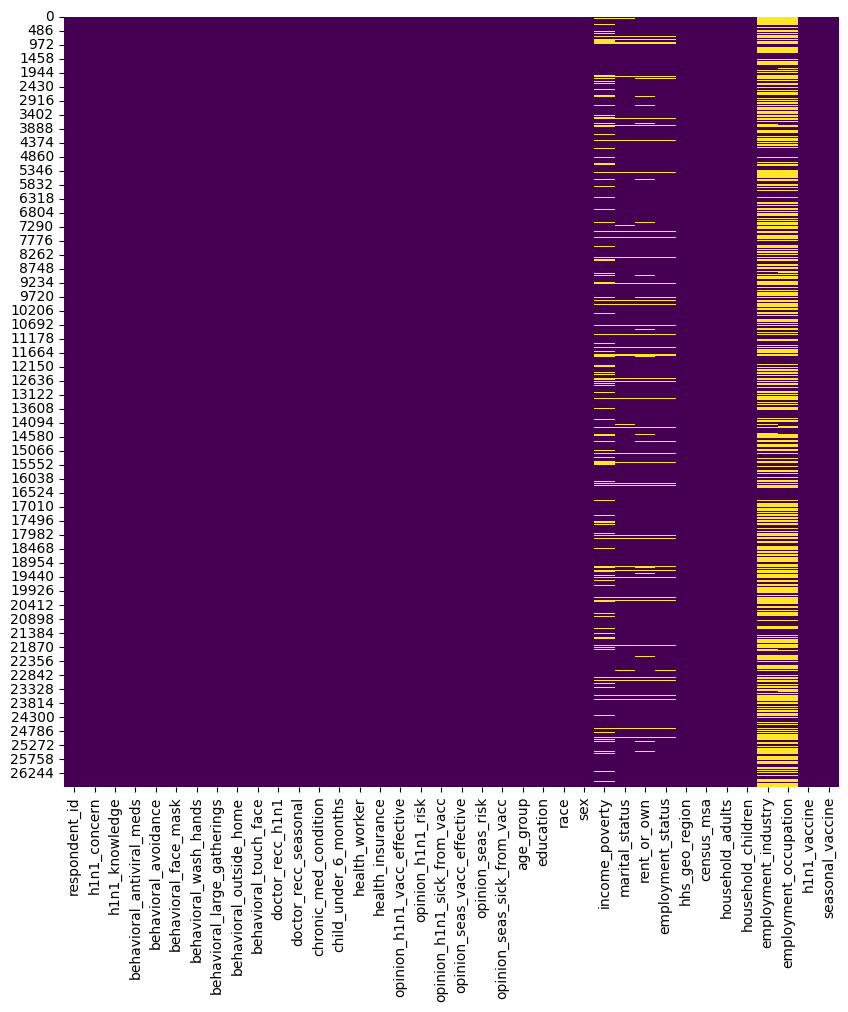

In [140]:
plotMissingData(joined_data)

In [141]:
joined_data['health_insurance'].unique()

array(['Has health insurance', 'Unknown', 'No health insurance'],
      dtype=object)

In [142]:
joined_data['health_insurance'] = joined_data['health_insurance'].fillna('Unknown')

In [143]:
joined_data['health_insurance'].unique()

array(['Has health insurance', 'Unknown', 'No health insurance'],
      dtype=object)

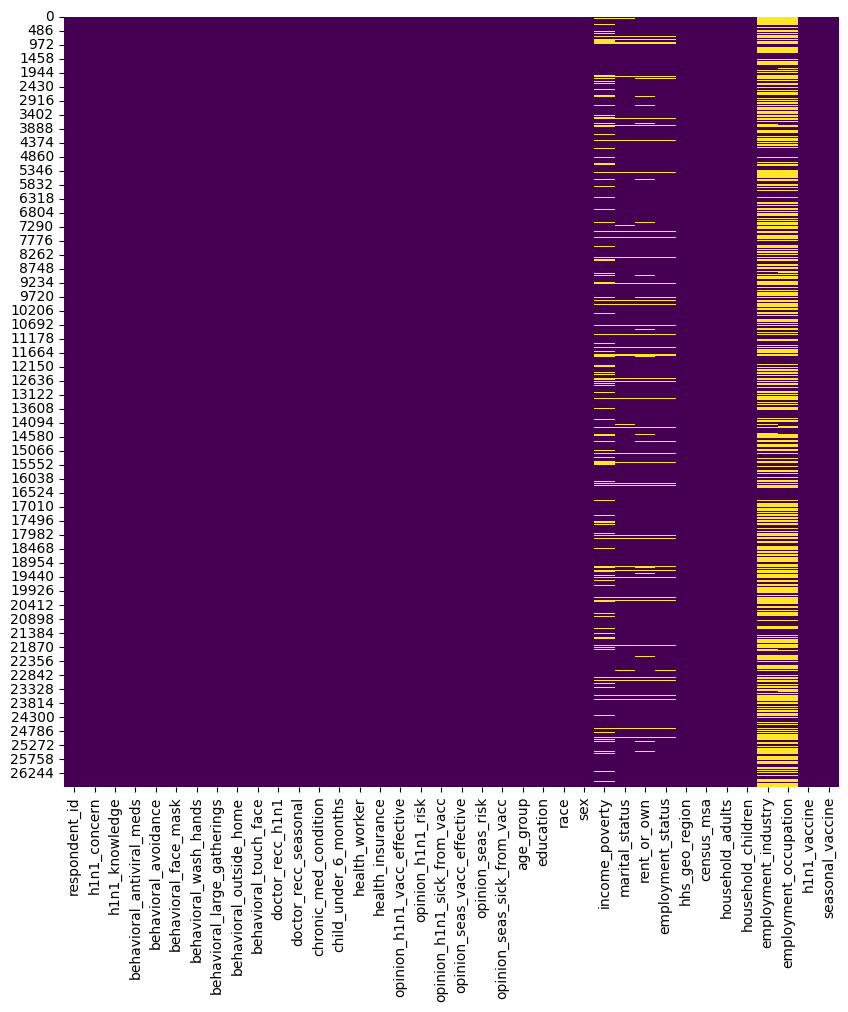

In [144]:
plotMissingData(joined_data)

In [145]:
joined_data['opinion_h1n1_vacc_effective'].unique()


array(['Dont know', 'Very effective', 'Somewhat effective',
       'Not very effective', 'Not effective', 'Unknown'], dtype=object)

In [146]:
joined_data['opinion_h1n1_risk'].unique()

array(['Very Low', 'High', 'Moderate', 'Low', 'Very High', 'Unknown'],
      dtype=object)

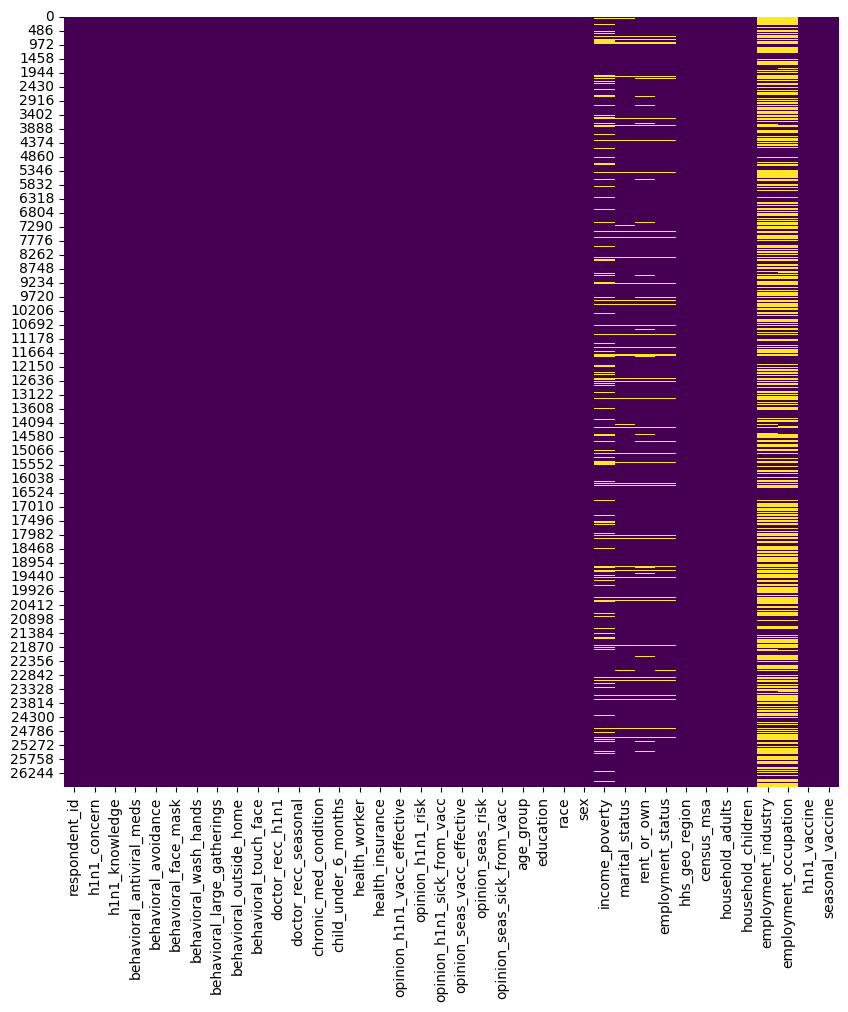

In [147]:
plotMissingData(joined_data)

In [148]:
joined_data['opinion_h1n1_sick_from_vacc'].unique()

array(['Not very worried', 'Somewhat worried', 'Not at all worried',
       'Very worried', 'Dont know', 'Unknown'], dtype=object)

In [149]:
joined_data['opinion_seas_vacc_effective'].unique()

array(['Not very effective', 'Somewhat effective', 'Very effective',
       'Dont know', 'Not effective', 'Unknown'], dtype=object)

In [150]:
joined_data['opinion_seas_risk'].unique()

array(['Very Low', 'Low', 'High', 'Moderate', 'Very High', 'Unknown'],
      dtype=object)

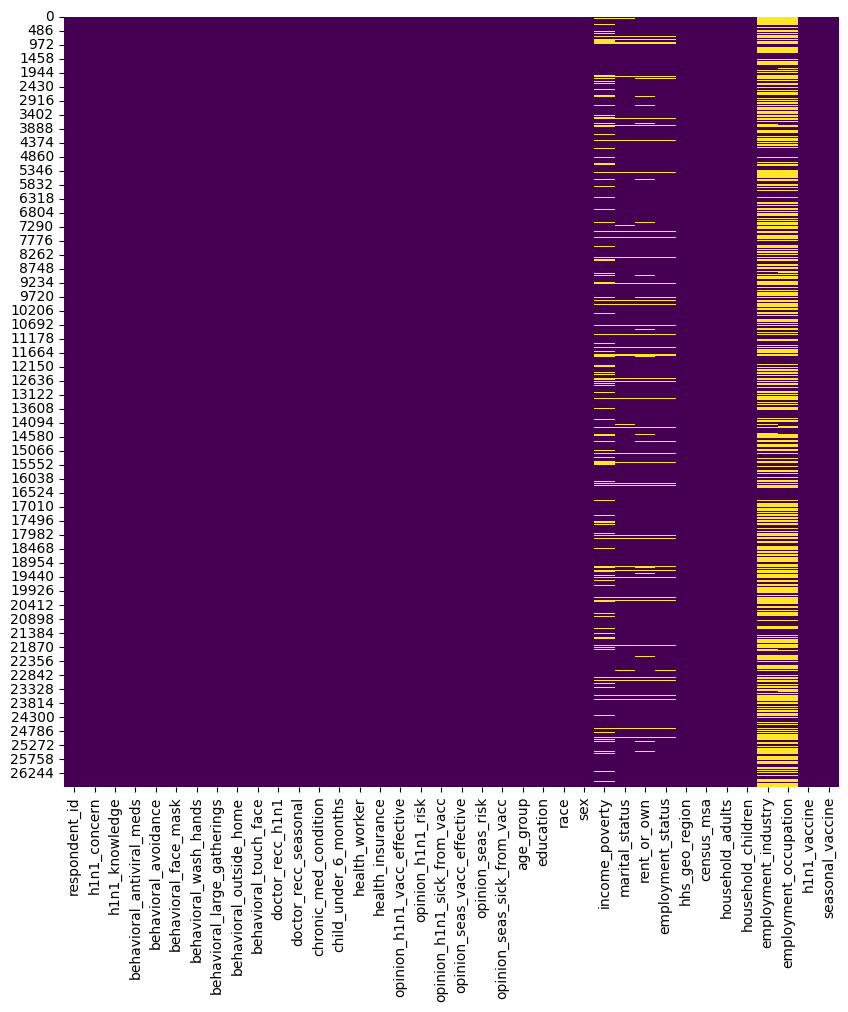

In [151]:
plotMissingData(joined_data)

In [152]:
joined_data['income_poverty'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

In [153]:
joined_data['income_poverty'] = joined_data['income_poverty'].fillna('Unknown')

In [154]:
joined_data['income_poverty'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000',
       'Unknown'], dtype=object)

In [155]:
joined_data['marital_status'].unique()

array(['Not Married', 'Married', nan], dtype=object)

In [156]:
joined_data['marital_status'] = joined_data['marital_status'].fillna('Unknown')

In [157]:
joined_data['marital_status'].unique()

array(['Not Married', 'Married', 'Unknown'], dtype=object)

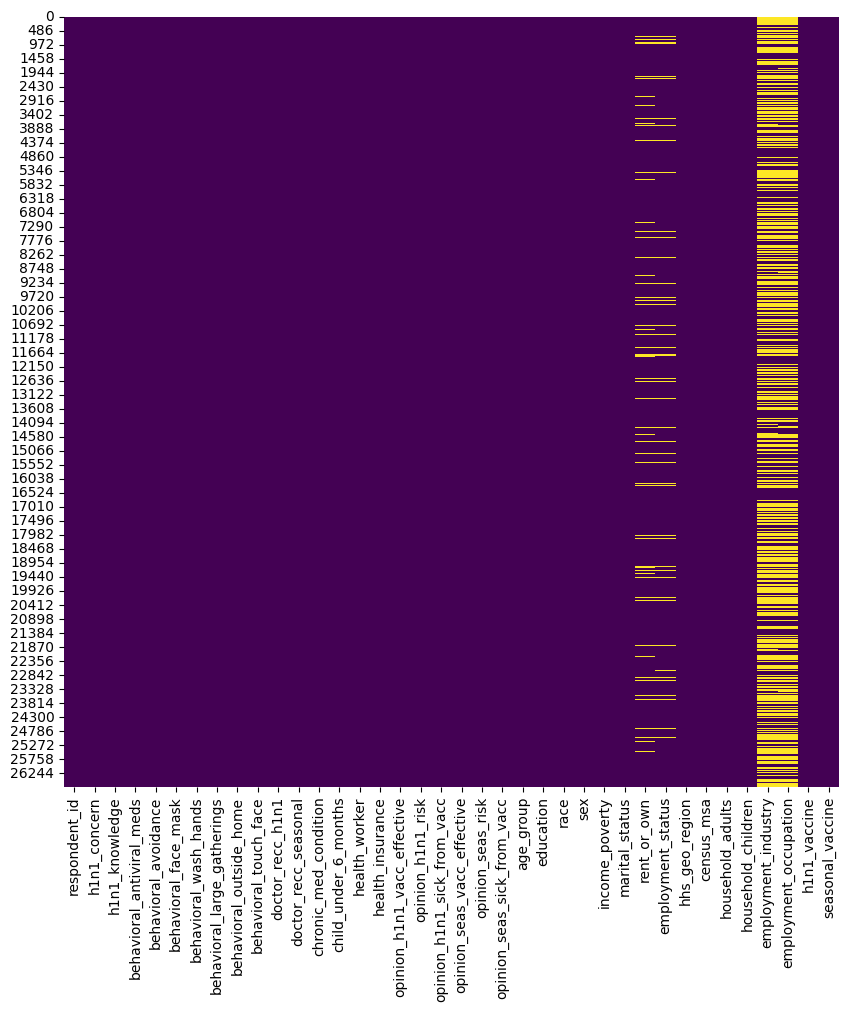

In [158]:
plotMissingData(joined_data)

In [159]:
joined_data['rent_or_own'].unique()

array(['Own', 'Rent', nan], dtype=object)

In [160]:
joined_data['rent_or_own'] = joined_data['rent_or_own'].fillna('Unknown')

In [161]:
joined_data['rent_or_own'].unique()

array(['Own', 'Rent', 'Unknown'], dtype=object)

In [162]:
joined_data['employment_status'].unique()

array(['Not in Labor Force', 'Employed', 'Unemployed', nan], dtype=object)

In [163]:
joined_data['employment_status'] = joined_data['employment_status'].fillna('Unknown')

In [164]:
joined_data['employment_status'].unique()

array(['Not in Labor Force', 'Employed', 'Unemployed', 'Unknown'],
      dtype=object)

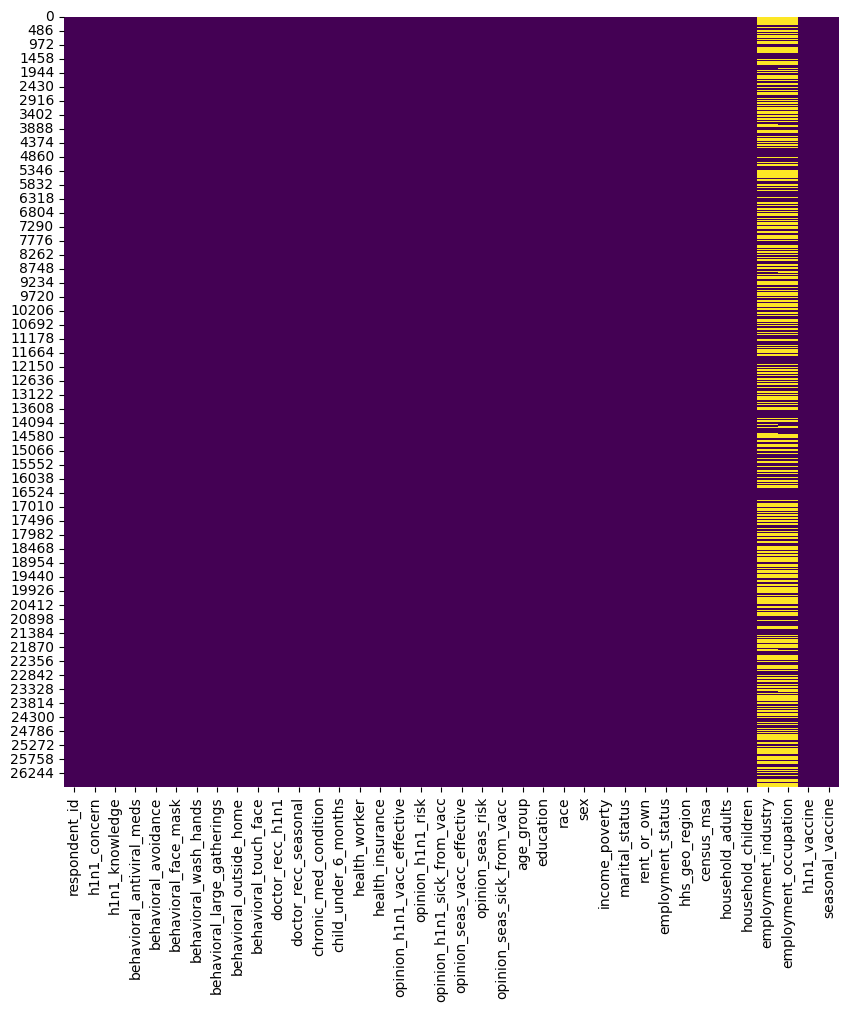

In [165]:
plotMissingData(joined_data)

In [166]:
joined_data['employment_industry'].unique()

array([nan, 'pxcmvdjn', 'rucpziij', 'wxleyezf', 'saaquncn', 'xicduogh',
       'ldnlellj', 'wlfvacwt', 'nduyfdeo', 'fcxhlnwr', 'vjjrobsf',
       'arjwrbjb', 'atmlpfrs', 'msuufmds', 'xqicxuve', 'phxvnwax',
       'dotnnunm', 'mfikgejo', 'cfqqtusy', 'mcubkhph', 'haxffmxo',
       'qnlwzans'], dtype=object)

In [167]:
joined_data['employment_industry'] = joined_data['employment_industry'].fillna('Unknown')

In [168]:
joined_data['employment_industry'].unique()

array(['Unknown', 'pxcmvdjn', 'rucpziij', 'wxleyezf', 'saaquncn',
       'xicduogh', 'ldnlellj', 'wlfvacwt', 'nduyfdeo', 'fcxhlnwr',
       'vjjrobsf', 'arjwrbjb', 'atmlpfrs', 'msuufmds', 'xqicxuve',
       'phxvnwax', 'dotnnunm', 'mfikgejo', 'cfqqtusy', 'mcubkhph',
       'haxffmxo', 'qnlwzans'], dtype=object)

In [169]:
joined_data['employment_occupation'].unique()

array([nan, 'xgwztkwe', 'xtkaffoo', 'emcorrxb', 'vlluhbov', 'xqwwgdyp',
       'ccgxvspp', 'qxajmpny', 'kldqjyjy', 'mxkfnird', 'hfxkjkmi',
       'bxpfxfdn', 'ukymxvdu', 'cmhcxjea', 'haliazsg', 'dlvbwzss',
       'xzmlyyjv', 'oijqvulv', 'rcertsgn', 'tfqavkke', 'hodpvpew',
       'uqqtjvyb', 'pvmttkik', 'dcjcmpih'], dtype=object)

In [170]:
joined_data['employment_occupation'] = joined_data['employment_occupation'].fillna('Unknown')

In [171]:
joined_data['employment_occupation'].unique()

array(['Unknown', 'xgwztkwe', 'xtkaffoo', 'emcorrxb', 'vlluhbov',
       'xqwwgdyp', 'ccgxvspp', 'qxajmpny', 'kldqjyjy', 'mxkfnird',
       'hfxkjkmi', 'bxpfxfdn', 'ukymxvdu', 'cmhcxjea', 'haliazsg',
       'dlvbwzss', 'xzmlyyjv', 'oijqvulv', 'rcertsgn', 'tfqavkke',
       'hodpvpew', 'uqqtjvyb', 'pvmttkik', 'dcjcmpih'], dtype=object)

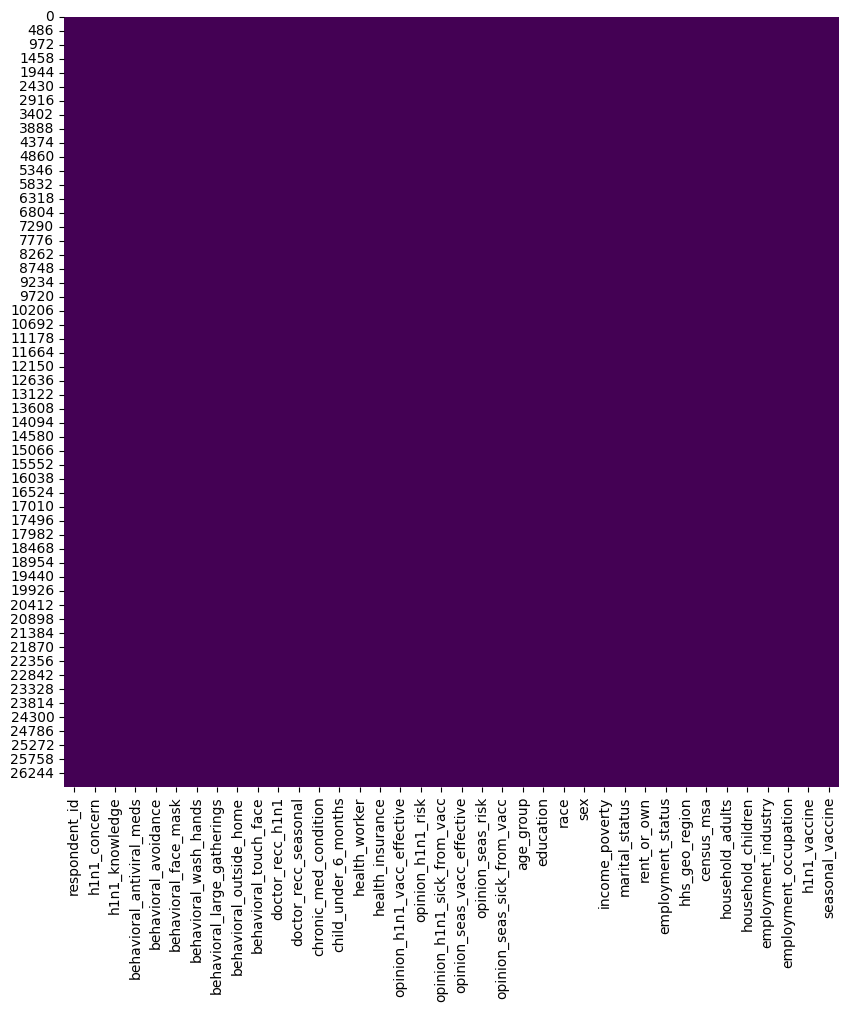

In [172]:
plotMissingData(joined_data) 

In [173]:
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   respondent_id                26707 non-null  int64 
 1   h1n1_concern                 26707 non-null  object
 2   h1n1_knowledge               26707 non-null  object
 3   behavioral_antiviral_meds    26707 non-null  object
 4   behavioral_avoidance         26707 non-null  object
 5   behavioral_face_mask         26707 non-null  object
 6   behavioral_wash_hands        26707 non-null  object
 7   behavioral_large_gatherings  26707 non-null  object
 8   behavioral_outside_home      26707 non-null  object
 9   behavioral_touch_face        26707 non-null  object
 10  doctor_recc_h1n1             26707 non-null  object
 11  doctor_recc_seasonal         26707 non-null  object
 12  chronic_med_condition        26707 non-null  object
 13  child_under_6_months         26

### 4.2. Creating the Target Values

In [174]:
conditions = [
    (joined_data['h1n1_vaccine'] == 'Not received') & (joined_data['seasonal_vaccine'] == 'Not received'),
    (joined_data['h1n1_vaccine'] == 'Received') & (joined_data['seasonal_vaccine'] == 'Not received'),
    (joined_data['h1n1_vaccine'] == 'Not received') & (joined_data['seasonal_vaccine'] =='Received'),
    (joined_data['h1n1_vaccine'] == 'Received') & (joined_data['seasonal_vaccine'] == 'Received')
]

choices = [
    'No Vaccines',
    'H1N1 Vaccine Only',
    'Seasonal Vaccine Only',
    'Both Vaccines'
]

joined_data['vaccine_status'] = np.select(conditions, choices, default='Unknown')



### 5.0. EDA

 Here I'm comparing those who are below poverty that do and dont have health insurance and seeing what kind of vaccinations they have

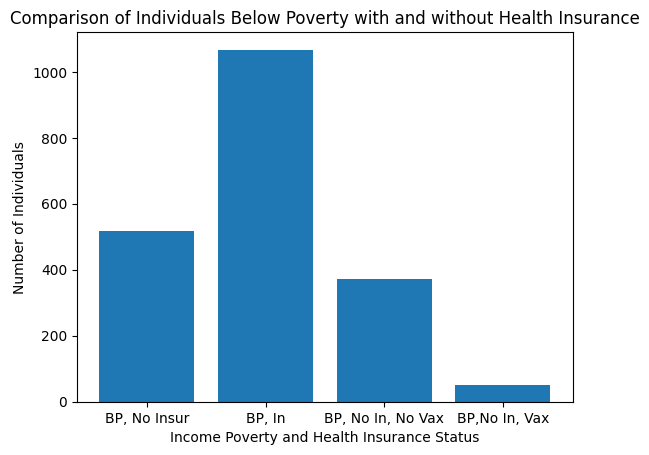

In [175]:
belowPovNoInsur_df = joined_data[(joined_data['income_poverty'] == 'Below Poverty') & (joined_data['health_insurance'] == 'No health insurance')]
belowPovInsur_df = joined_data[(joined_data['income_poverty'] == 'Below Poverty') & (joined_data['health_insurance'] == 'Has health insurance')]

belowPovNoInsurNoVaccine_df = joined_data[(joined_data['income_poverty'] == 'Below Poverty') & (joined_data['health_insurance'] == 'No health insurance')& (joined_data['h1n1_vaccine'] == 'Not received')& (joined_data['seasonal_vaccine'] == 'Not received')]
belowPovNoInsurVaccine_df= joined_data[(joined_data['income_poverty'] == 'Below Poverty') & (joined_data['health_insurance'] == 'No health insurance')& (joined_data['h1n1_vaccine'] == 'Received') & (joined_data['seasonal_vaccine'] == 'Received')]

# Count the number of rows in each DataFrame
belowPovNoInsur_count = len(belowPovNoInsur_df)
belowPovInsur_count = len(belowPovInsur_df)
belowPovNoInsurNoVaccine_count = len(belowPovNoInsurNoVaccine_df)
belowPovNoInsurVaccine_count = len(belowPovNoInsurVaccine_df)

# Labels and values for the bar chart
labels = ['BP, No Insur', 'BP, In' , 'BP, No In, No Vax', 'BP,No In, Vax']
values = [belowPovNoInsur_count, belowPovInsur_count, belowPovNoInsurNoVaccine_count, belowPovNoInsurVaccine_count]

# Create a bar chart
#plt.bar(labels, values, color=['red', 'green'])
plt.bar(labels, values)

plt.xlabel('Income Poverty and Health Insurance Status')
plt.ylabel('Number of Individuals')
plt.title('Comparison of Individuals Below Poverty with and without Health Insurance')
plt.show()

Here Ill looking to see how many people are and arent healthcare workers. I feel like ayone who is will automatically be getting both vaccinations regardless of there other responses.

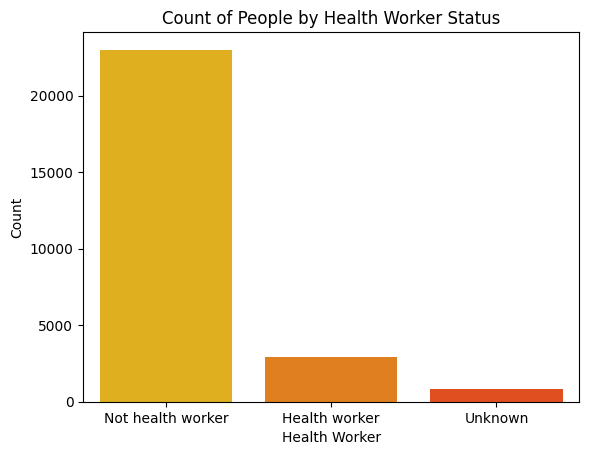

In [176]:
# Create a copy of the original DataFrame
vaccines_df_copy =   joined_data.copy()

# Convert 'health_worker' column to string type in the copied DataFrame
vaccines_df_copy['health_worker'] = vaccines_df_copy['health_worker'].astype(str)

# Replace missing values in the 'health_worker' column with 'Unknown'
vaccines_df_copy['health_worker'].fillna('Unknown', inplace=True)


# Plotting (optional)
sns.countplot(x='health_worker', data=vaccines_df_copy, palette='autumn_r')
plt.xlabel('Health Worker')
plt.ylabel('Count')
plt.title('Count of People by Health Worker Status')
plt.show()

In [177]:

'''# Select the columns for the pair plot
selected_columns = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_large_gatherings']

# Add 'h1n1_vaccine' as a hue
sns.pairplot(joined_data, vars=selected_columns, hue='h1n1_vaccine')

# Show the plot
plt.show()

# Select the columns for the pair plot
selected_columns = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_large_gatherings']

# Add 'seasonal_vaccine' as a hue
sns.pairplot(joined_data, vars=selected_columns, hue='seasonal_vaccine')

# Show the plot
plt.show()'''


"# Select the columns for the pair plot\nselected_columns = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_large_gatherings']\n\n# Add 'h1n1_vaccine' as a hue\nsns.pairplot(joined_data, vars=selected_columns, hue='h1n1_vaccine')\n\n# Show the plot\nplt.show()\n\n# Select the columns for the pair plot\nselected_columns = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_large_gatherings']\n\n# Add 'seasonal_vaccine' as a hue\nsns.pairplot(joined_data, vars=selected_columns, hue='seasonal_vaccine')\n\n# Show the plot\nplt.show()"

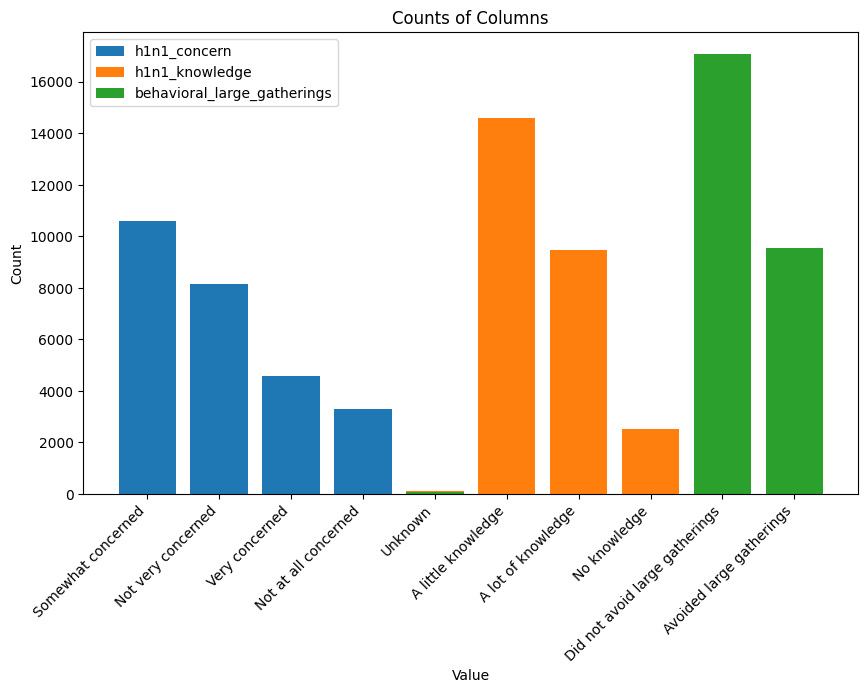

In [178]:

# Count the occurrences of each unique value in the columns
h1n1_concern_counts = joined_data['h1n1_concern'].value_counts()
h1n1_knowledge_counts = joined_data['h1n1_knowledge'].value_counts()
behavioral_large_gatherings_counts = joined_data['behavioral_large_gatherings'].value_counts()

# Plot the counts using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(h1n1_concern_counts.index, h1n1_concern_counts.values, label='h1n1_concern')
plt.bar(h1n1_knowledge_counts.index, h1n1_knowledge_counts.values, label='h1n1_knowledge')
plt.bar(behavioral_large_gatherings_counts.index, behavioral_large_gatherings_counts.values, label='behavioral_large_gatherings')

plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Counts of Columns')
plt.legend()

# Modify x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()


Here I compare what people think of the seasonal vaccines effectiveness and if people avoid large gatherings.

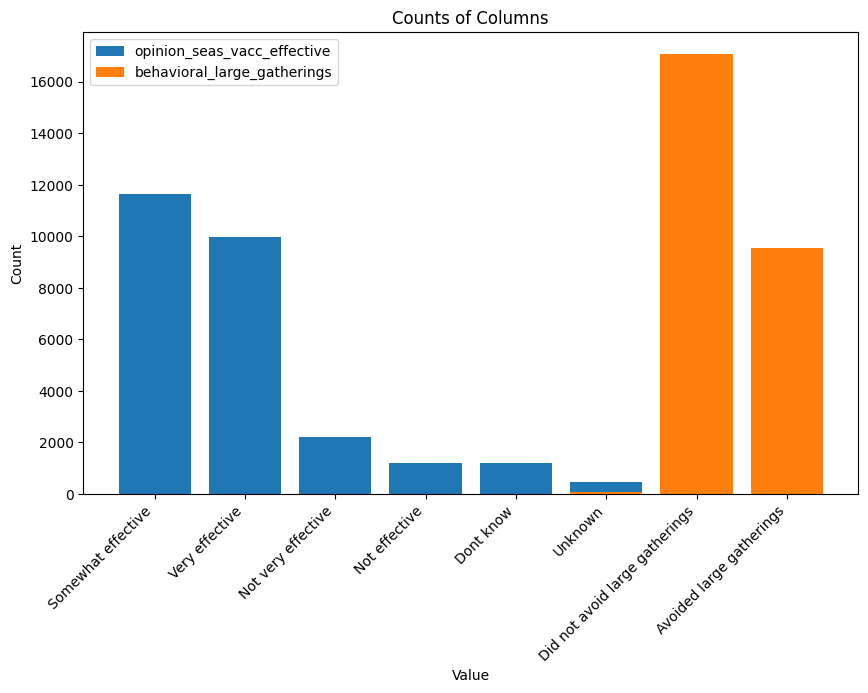

In [179]:
'''sns.pairplot(joined_data, vars=['opinion_seas_vacc_effective', 'behavioral_large_gatherings'], hue='seasonal_vaccine', plot_kws={'s': 10, 'alpha': 0.5})
plt.show()'''
# Calculate the counts of each unique value in the columns
opinion_seas_vacc_effective_counts = joined_data['opinion_seas_vacc_effective'].value_counts()
behavioral_large_gatherings_counts = joined_data['behavioral_large_gatherings'].value_counts()

# Plot the counts using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(opinion_seas_vacc_effective_counts.index, opinion_seas_vacc_effective_counts.values, label='opinion_seas_vacc_effective')
plt.bar(behavioral_large_gatherings_counts.index, behavioral_large_gatherings_counts.values, label='behavioral_large_gatherings')

plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Counts of Columns')
plt.legend()

# Modify x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()


It seems that most people think the vaccine is worth taking and most people did not avoid large gatherings.

Here will check correlation between people who have childern and who are on medication with those of who got a vaccination.

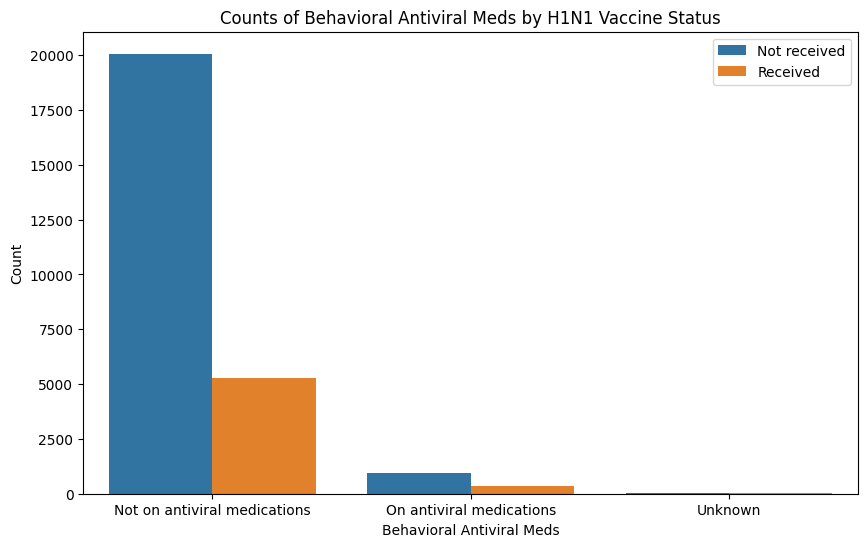

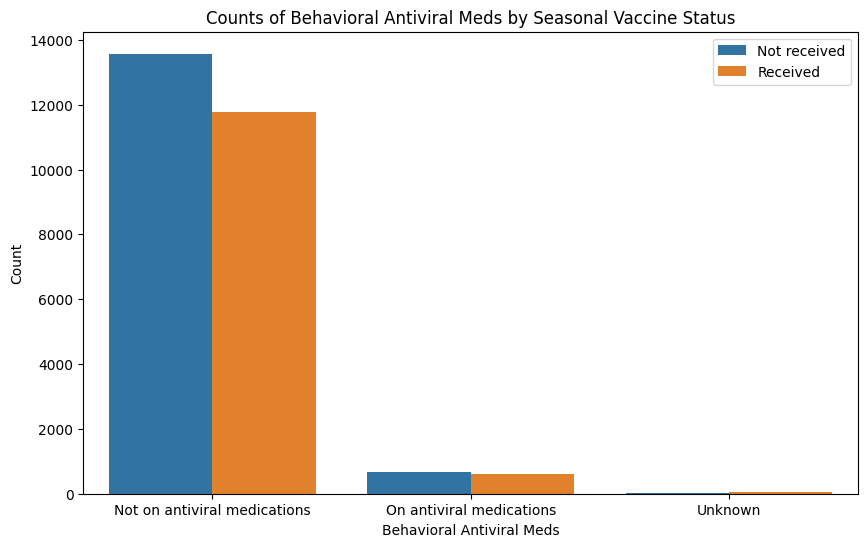

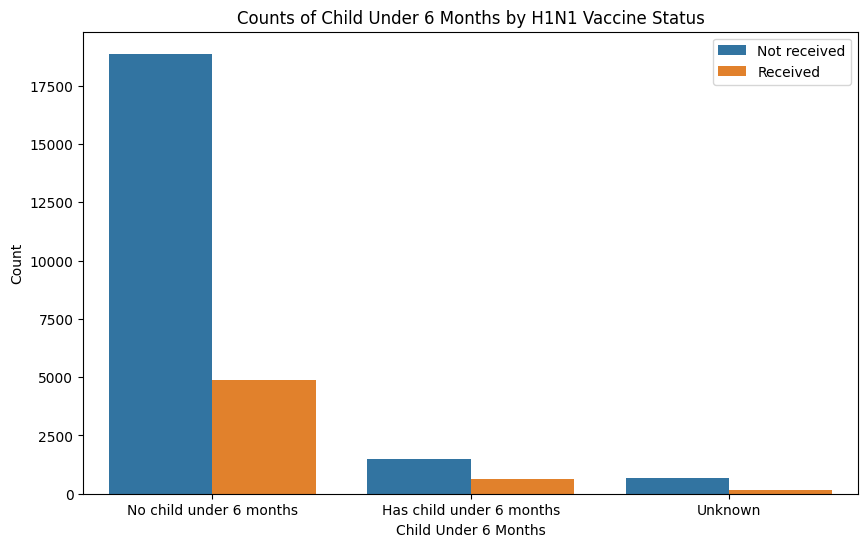

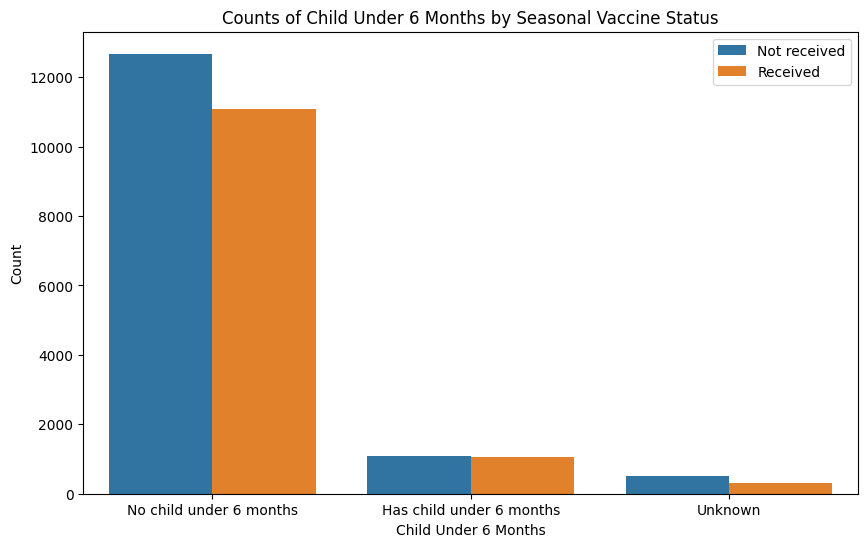

In [180]:

# Create a bar chart for the 'behavioral_antiviral_meds' column
plt.figure(figsize=(10, 6))
sns.countplot(x='behavioral_antiviral_meds', data=joined_data, hue='h1n1_vaccine')
plt.xlabel('Behavioral Antiviral Meds')
plt.ylabel('Count')
plt.title('Counts of Behavioral Antiviral Meds by H1N1 Vaccine Status')
plt.legend()
plt.show()

# Create a bar chart for the 'behavioral_antiviral_meds' column
plt.figure(figsize=(10, 6))
sns.countplot(x='behavioral_antiviral_meds', data=joined_data, hue='seasonal_vaccine')
plt.xlabel('Behavioral Antiviral Meds')
plt.ylabel('Count')
plt.title('Counts of Behavioral Antiviral Meds by Seasonal Vaccine Status')
plt.legend()
plt.show()

# Create a bar chart for the 'child_under_6_months' column
plt.figure(figsize=(10, 6))
sns.countplot(x='child_under_6_months', data=joined_data, hue='h1n1_vaccine')
plt.xlabel('Child Under 6 Months')
plt.ylabel('Count')
plt.title('Counts of Child Under 6 Months by H1N1 Vaccine Status')
plt.legend()
plt.show()

# Create a bar chart for the 'child_under_6_months' column
plt.figure(figsize=(10, 6))
sns.countplot(x='child_under_6_months', data=joined_data, hue='seasonal_vaccine')
plt.xlabel('Child Under 6 Months')
plt.ylabel('Count')
plt.title('Counts of Child Under 6 Months by Seasonal Vaccine Status')
plt.legend()
plt.show()




It seems like a higer percentage of people who are on antiviral meds then those who arent were worried more about the seasonal vaccine than the h1n1. Nearly all of respondents with childern got the seasonal vaccine while less than half of them got the h1n1 vaccine.

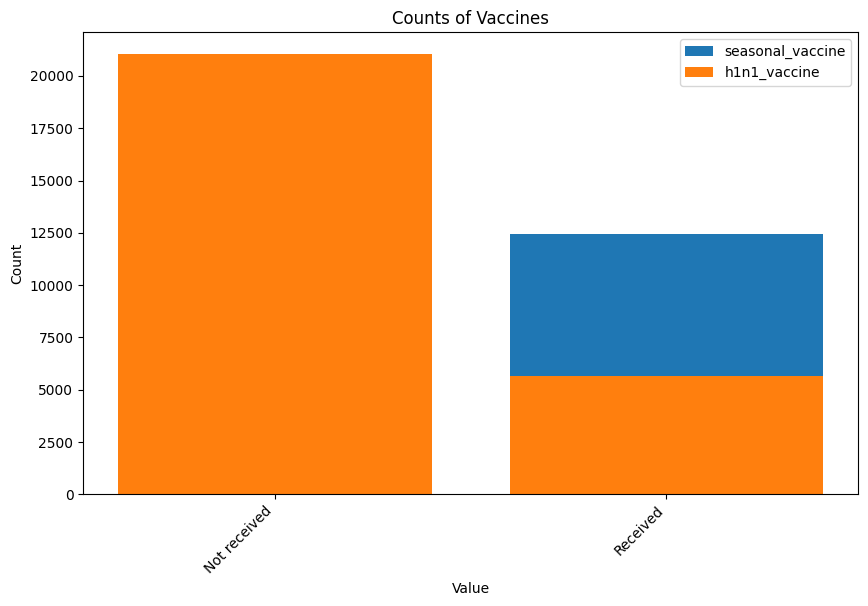

In [181]:
#sns.pairplot(joined_data, vars=['seasonal_vaccine', 'h1n1_vaccine'], hue='health_worker', plot_kws={'s': 10, 'alpha': 0.5})
# Calculate the counts of each unique value in the columns
seasonal_vaccine_counts = joined_data['seasonal_vaccine'].value_counts()
h1n1_vaccine_counts = joined_data['h1n1_vaccine'].value_counts()

# Plot the counts using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(seasonal_vaccine_counts.index, seasonal_vaccine_counts.values, label='seasonal_vaccine')
plt.bar(h1n1_vaccine_counts.index, h1n1_vaccine_counts.values, label='h1n1_vaccine')

plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Counts of Vaccines')
plt.legend()

# Modify x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()
  

In [182]:
joined_data.info(37)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   respondent_id                26707 non-null  int64 
 1   h1n1_concern                 26707 non-null  object
 2   h1n1_knowledge               26707 non-null  object
 3   behavioral_antiviral_meds    26707 non-null  object
 4   behavioral_avoidance         26707 non-null  object
 5   behavioral_face_mask         26707 non-null  object
 6   behavioral_wash_hands        26707 non-null  object
 7   behavioral_large_gatherings  26707 non-null  object
 8   behavioral_outside_home      26707 non-null  object
 9   behavioral_touch_face        26707 non-null  object
 10  doctor_recc_h1n1             26707 non-null  object
 11  doctor_recc_seasonal         26707 non-null  object
 12  chronic_med_condition        26707 non-null  object
 13  child_under_6_months         26

In [183]:
column_names = joined_data.columns.tolist()
print(column_names)


['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults', 'household_children', 'employment_industry', 'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine', 'vaccine_status']


In [184]:
income_proverty_counts = joined_data.groupby('income_poverty')['respondent_id'].count()



In [185]:
counts_of_h1n1 = joined_data.groupby('income_poverty')['h1n1_vaccine'].value_counts()
print(counts_of_h1n1)

income_poverty             h1n1_vaccine
<= $75,000, Above Poverty  Not received    10178
                           Received         2599
> $75,000                  Not received     5087
                           Received         1723
Below Poverty              Not received     2181
                           Received          516
Unknown                    Not received     3587
                           Received          836
Name: count, dtype: int64


In [186]:
counts_of_seasonal = joined_data.groupby('income_poverty')['seasonal_vaccine'].value_counts()
print(counts_of_seasonal)

income_poverty             seasonal_vaccine
<= $75,000, Above Poverty  Not received        6686
                           Received            6091
> $75,000                  Not received        3427
                           Received            3383
Below Poverty              Not received        1719
                           Received             978
Unknown                    Not received        2440
                           Received            1983
Name: count, dtype: int64


In [187]:
test_GB = joined_data.groupby(['income_poverty','seasonal_vaccine'])['h1n1_vaccine'].value_counts(normalize=True)
print(test_GB)


income_poverty             seasonal_vaccine  h1n1_vaccine
<= $75,000, Above Poverty  Not received      Not received    0.937033
                                             Received        0.062967
                           Received          Not received    0.642423
                                             Received        0.357577
> $75,000                  Not received      Not received    0.926758
                                             Received        0.073242
                           Received          Not received    0.564883
                                             Received        0.435117
Below Poverty              Not received      Not received    0.919139
                                             Received        0.080861
                           Received          Not received    0.614519
                                             Received        0.385481
Unknown                    Not received      Not received    0.931967
                                

In [188]:
test_GB = joined_data.groupby(['income_poverty','seasonal_vaccine','h1n1_vaccine'])['respondent_id'].value_counts(normalize=True)
print(test_GB)

income_poverty             seasonal_vaccine  h1n1_vaccine  respondent_id
<= $75,000, Above Poverty  Not received      Not received  8818             0.000160
                                                           8822             0.000160
                                                           8821             0.000160
                                                           8806             0.000160
                                                           8812             0.000160
                                                                              ...   
Unknown                    Received          Received      23802            0.001493
                                                           23826            0.001493
                                                           24004            0.001493
                                                           24158            0.001493
                                                           23687            0

In [189]:
by_location = joined_data.groupby(['hhs_geo_region','seasonal_vaccine','h1n1_vaccine'])['respondent_id'].count()
print(by_location)

hhs_geo_region  seasonal_vaccine  h1n1_vaccine
atmpeygn        Not received      Not received     968
                                  Received          63
                Received          Not received     623
                                  Received         379
bhuqouqj        Not received      Not received    1313
                                  Received         120
                Received          Not received     797
                                  Received         616
dqpwygqj        Not received      Not received     602
                                  Received          35
                Received          Not received     331
                                  Received         158
fpwskwrf        Not received      Not received    1592
                                  Received         125
                Received          Not received    1015
                                  Received         533
kbazzjca        Not received      Not received    1394
                  

In [190]:
by_doc = joined_data.groupby(['doctor_recc_seasonal','doctor_recc_h1n1','seasonal_vaccine','h1n1_vaccine'])['respondent_id'].count()
print(by_doc)

doctor_recc_seasonal  doctor_recc_h1n1  seasonal_vaccine  h1n1_vaccine
Not Recommended       Not Recommended   Not received      Not received    9762
                                                          Received         481
                                        Received          Not received    3611
                                                          Received        1805
                      Recommended       Not received      Not received     275
                                                          Received         238
                                        Received          Not received     135
                                                          Received         146
Recommended           Not Recommended   Not received      Not received     770
                                                          Received          33
                                        Received          Not received    2386
                                                          Re

Here I look to see what if an correlation income has on peoples decicion to get the seasonal vaccination.

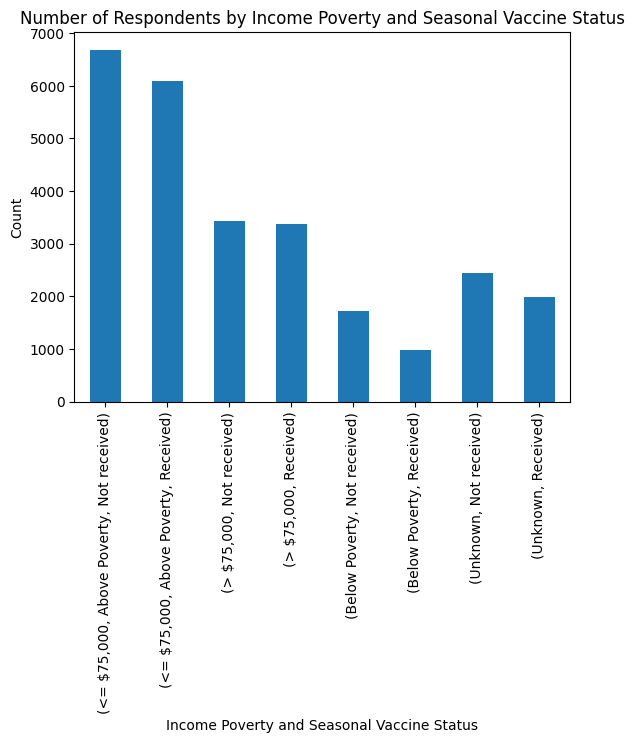

"# Group by 'age_group' and 'h1n1_vaccine' columns and calculate the mean of 'h1n1_concern'\ngrouped_data2 = joined_data.groupby(['age_group', 'h1n1_vaccine'])['h1n1_concern'].mean()\n\n# Plot the grouped data as a bar chart\ngrouped_data2.plot(kind='bar')\n\n# Set the labels and title\nplt.xlabel('Age Group and H1N1 Vaccine Status')\nplt.ylabel('Mean H1N1 Concern')\nplt.title('Mean H1N1 Concern by Age Group and H1N1 Vaccine Status')\n\n# Show the plot\nplt.show()\n#print(grouped_data2)\n"

In [191]:
'''# Group by 'income_poverty' and 'seasonal_vaccine' columns and count the number of respondents
grouped_data1 = joined_data.groupby(['income_poverty', 'seasonal_vaccine']).size()
print(grouped_data1)

# Group by 'age_group' and 'h1n1_vaccine' columns and calculate the mean of 'h1n1_concern'
grouped_data2 = joined_data.groupby(['age_group', 'h1n1_vaccine'])['h1n1_concern'].mean()'''
# Group by 'income_poverty' and 'seasonal_vaccine' columns and count the number of respondents
grouped_data1 = joined_data.groupby(['income_poverty', 'seasonal_vaccine']).size()

# Plot the grouped data as a bar chart
grouped_data1.plot(kind='bar')

# Set the labels and title
plt.xlabel('Income Poverty and Seasonal Vaccine Status')
plt.ylabel('Count')
plt.title('Number of Respondents by Income Poverty and Seasonal Vaccine Status')

# Show the plot
plt.show()

'''# Group by 'age_group' and 'h1n1_vaccine' columns and calculate the mean of 'h1n1_concern'
grouped_data2 = joined_data.groupby(['age_group', 'h1n1_vaccine'])['h1n1_concern'].mean()

# Plot the grouped data as a bar chart
grouped_data2.plot(kind='bar')

# Set the labels and title
plt.xlabel('Age Group and H1N1 Vaccine Status')
plt.ylabel('Mean H1N1 Concern')
plt.title('Mean H1N1 Concern by Age Group and H1N1 Vaccine Status')

# Show the plot
plt.show()
#print(grouped_data2)
'''

Within each income group the numbers are close to 50%, with the Below Poverty group having the largest percent diference.

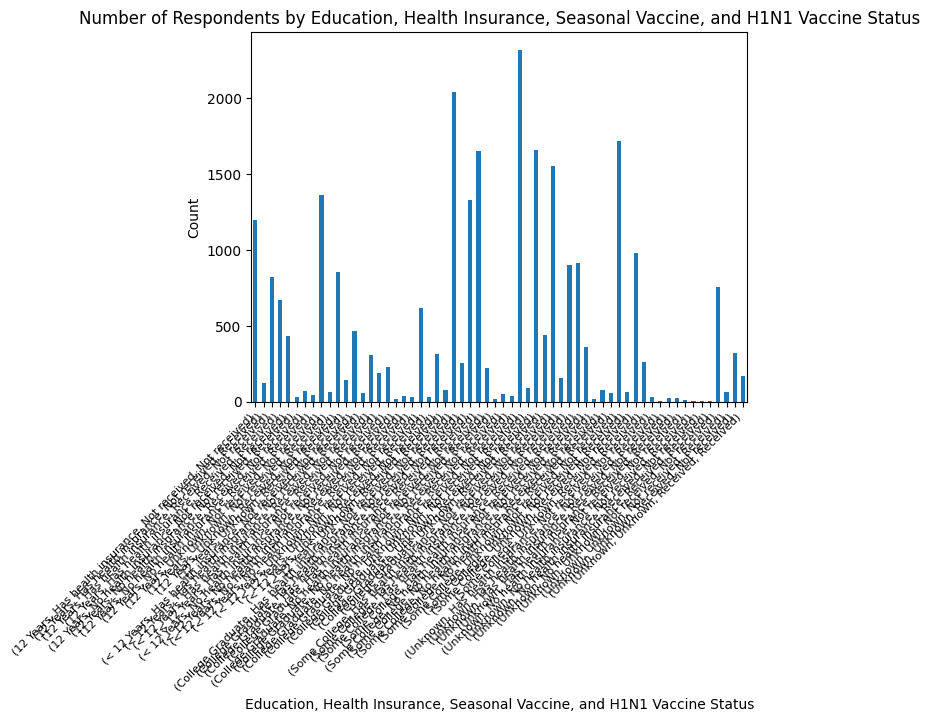

In [192]:

'''# Group by 'education' and 'health_insurance' columns and calculate the sum of 'behavioral_avoidance'
grouped_data3 = joined_data.groupby(['education', 'health_insurance','seasonal_vaccine','h1n1_vaccine'])['behavioral_avoidance'].count()
print(grouped_data3)'''

# Group by 'education' and 'health_insurance' columns and calculate the sum of 'behavioral_avoidance'
grouped_data3 = joined_data.groupby(['education', 'health_insurance','seasonal_vaccine','h1n1_vaccine'])['behavioral_avoidance'].count()
'''
# Plot the grouped data as a bar chart
grouped_data3.plot(kind='bar')

# Set the labels and title
plt.xlabel('Education, Health Insurance, Seasonal Vaccine, and H1N1 Vaccine Status')
plt.ylabel('Count')
plt.title('Number of Respondents by Education, Health Insurance, Seasonal Vaccine, and H1N1 Vaccine Status')

# Show the plot
plt.show()'''
# Plot the grouped data as a bar chart
ax = grouped_data3.plot(kind='bar')

# Set the labels and title
ax.set_xlabel('Education, Health Insurance, Seasonal Vaccine, and H1N1 Vaccine Status')
ax.set_ylabel('Count')
ax.set_title('Number of Respondents by Education, Health Insurance, Seasonal Vaccine, and H1N1 Vaccine Status')

# Rotate x-axis labels and reduce font size
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)

# Show the plot
plt.show()


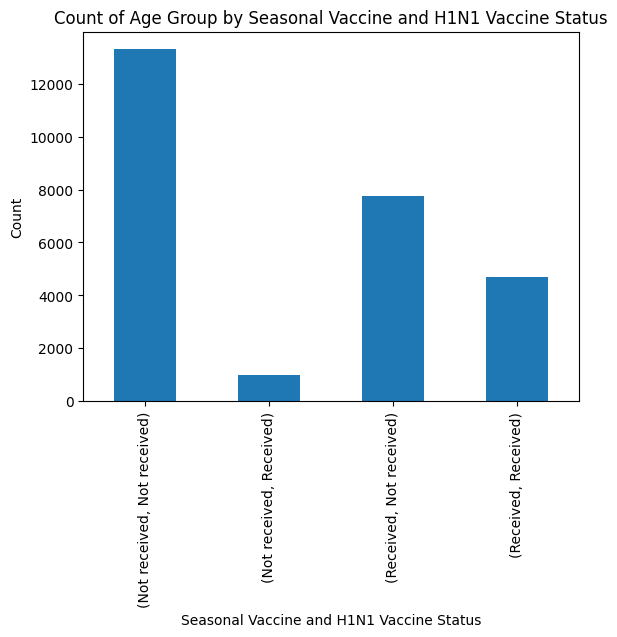

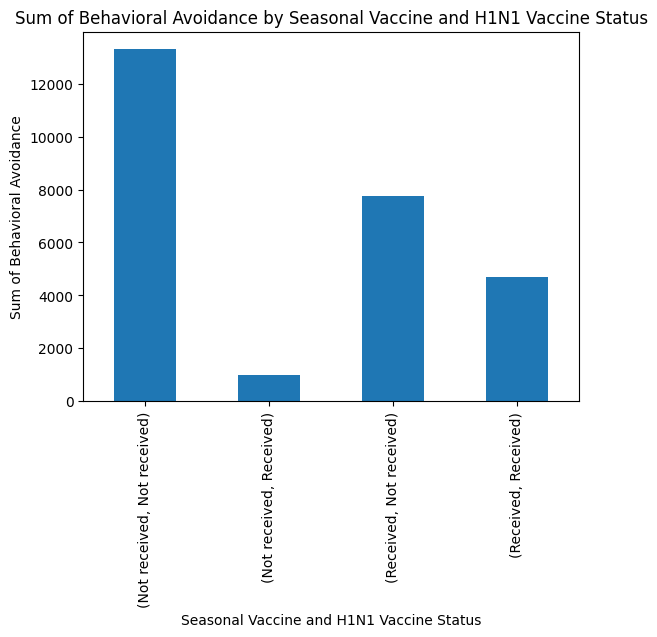

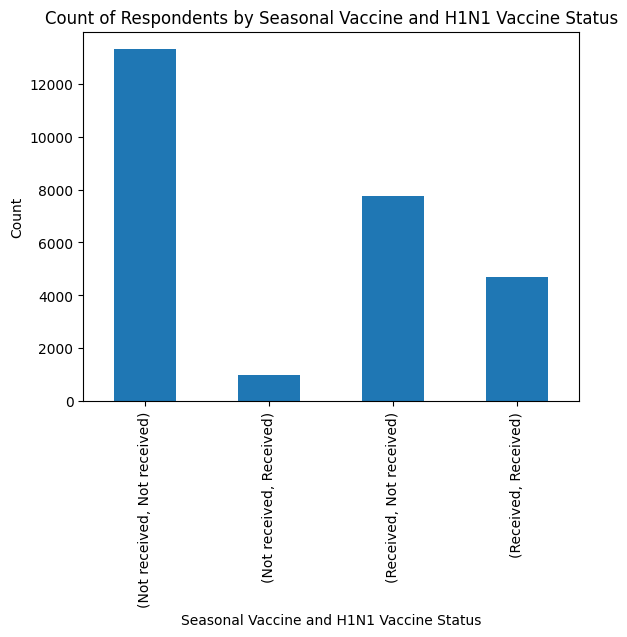

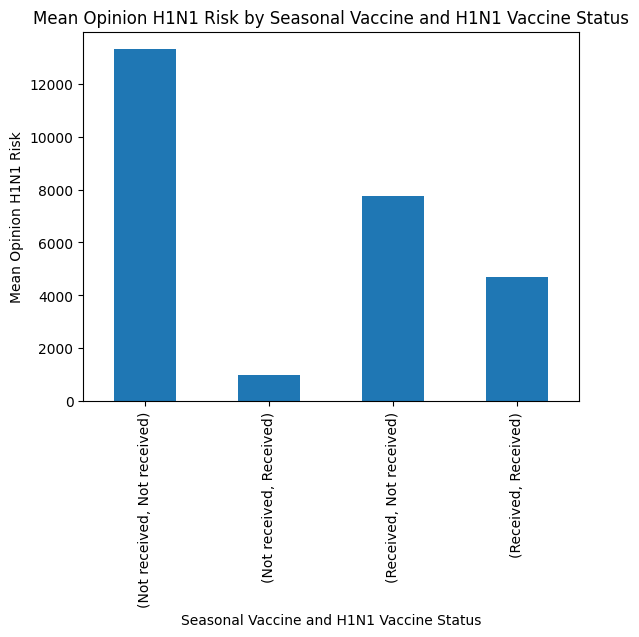

In [193]:
# Group by 'seasonal_vaccine' and 'h1n1_vaccine', and calculate the mean of 'age_group'
grouped_data1 = joined_data.groupby(['seasonal_vaccine', 'h1n1_vaccine'])['age_group'].count()

# Group by 'seasonal_vaccine' and 'h1n1_vaccine', and calculate the sum of 'behavioral_avoidance'
grouped_data2 = joined_data.groupby(['seasonal_vaccine', 'h1n1_vaccine'])['behavioral_avoidance'].count()

# Group by 'seasonal_vaccine' and 'h1n1_vaccine', and count the number of respondents
grouped_data3 = joined_data.groupby(['seasonal_vaccine', 'h1n1_vaccine']).size()

# Group by 'seasonal_vaccine' and 'h1n1_vaccine', and calculate the mean of 'opinion_h1n1_risk'
grouped_data4 = joined_data.groupby(['seasonal_vaccine', 'h1n1_vaccine'])['opinion_h1n1_risk'].count()

# Plot the grouped data as a bar chart
grouped_data1.plot(kind='bar')
plt.xlabel('Seasonal Vaccine and H1N1 Vaccine Status')
plt.ylabel('Count')
plt.title('Count of Age Group by Seasonal Vaccine and H1N1 Vaccine Status')

# Show the plot
plt.show()

# Plot the grouped data as a bar chart
grouped_data2.plot(kind='bar')
plt.xlabel('Seasonal Vaccine and H1N1 Vaccine Status')
plt.ylabel('Sum of Behavioral Avoidance')
plt.title('Sum of Behavioral Avoidance by Seasonal Vaccine and H1N1 Vaccine Status')

# Show the plot
plt.show()

# Plot the grouped data as a bar chart
grouped_data3.plot(kind='bar')
plt.xlabel('Seasonal Vaccine and H1N1 Vaccine Status')
plt.ylabel('Count')
plt.title('Count of Respondents by Seasonal Vaccine and H1N1 Vaccine Status')

# Show the plot
plt.show()

# Plot the grouped data as a bar chart
grouped_data4.plot(kind='bar')
plt.xlabel('Seasonal Vaccine and H1N1 Vaccine Status')
plt.ylabel('Mean Opinion H1N1 Risk')
plt.title('Mean Opinion H1N1 Risk by Seasonal Vaccine and H1N1 Vaccine Status')

# Show the plot
plt.show()



### 6.0. Saving the Data

In [194]:
joined_data.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine,vaccine_status
0,0,Not very concerned,No knowledge,Not on antiviral medications,Did not avoid,Did not wear mask,Did not wash hands,Did not avoid large gatherings,Left home,Touched face,...,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Unknown,Unknown,Not received,Not received,No Vaccines
1,1,Very concerned,A lot of knowledge,Not on antiviral medications,Avoided,Did not wear mask,Washed hands,Did not avoid large gatherings,Left home,Touched face,...,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,Not received,Received,Seasonal Vaccine Only
2,2,Not very concerned,A little knowledge,Not on antiviral medications,Avoided,Did not wear mask,Did not wash hands,Did not avoid large gatherings,Did not leave home,Did not touch face,...,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,Not received,Not received,No Vaccines
3,3,Not very concerned,A little knowledge,Not on antiviral medications,Avoided,Did not wear mask,Washed hands,Avoided large gatherings,Did not leave home,Did not touch face,...,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Unknown,Unknown,Not received,Received,Seasonal Vaccine Only
4,4,Somewhat concerned,A little knowledge,Not on antiviral medications,Avoided,Did not wear mask,Washed hands,Avoided large gatherings,Did not leave home,Touched face,...,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,Not received,Not received,No Vaccines


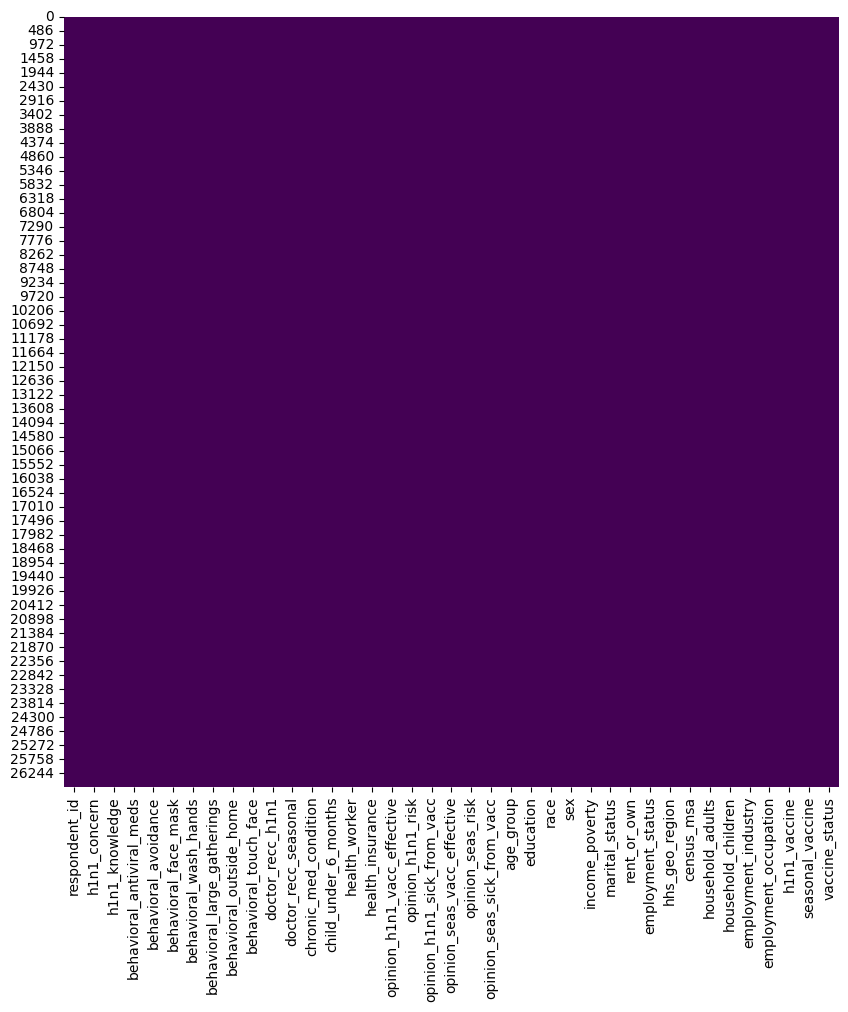

In [195]:
plotMissingData(joined_data)

In [196]:
joined_data.to_csv('joined_data_train.csv', index=False)


### 7.0. Summary



In this notebook I have changed the Non categorical features to categorical ones. I created the four target values to be used in the model. While exploring the data I have noticed that it seems like more people have opted for the seasonal vaccine than the h1n1.